# Simulación de evento y reconstrucción de trayectorias en Toy Model

### Importaciones

In [1]:
import proyecto.eventos.eventos as modelo
import proyecto.reconstruccion.principal as principal
import numpy as np

### Configuración de detector y generador

Configuraciones de detector

In [2]:
N_MODULOS = 4
LX = float("+inf")
LY = float("+inf")
ESPACIADO_Z = 1.0

detector = modelo.Geometria_detector(
    id_modulos=list(range(N_MODULOS)),
    lx=[LX] * N_MODULOS,
    ly=[LY] * N_MODULOS,
    z=[i + ESPACIADO_Z for i in range(N_MODULOS)]
)


detector

Geometria_detector(id_modulos=[0, 1, 2, 3], lx=[inf, inf, inf, inf], ly=[inf, inf, inf, inf], z=[1.0, 2.0, 3.0, 4.0])

Generador de eventos

In [3]:
generador = modelo.Generador(
    geometria_detector=detector,
    theta_max=np.pi / 6
)

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

### Generación y visualización de evento 

In [5]:
N_PARTICULAS = 40
evento = generador.generar_evento(N_PARTICULAS)

[Impacto(id_impacto=0, x=np.float64(0.5068860536667588), y=np.float64(0.25976734958442027), z=1.0, id_modulo=0, id_rastro=0), Impacto(id_impacto=4, x=np.float64(-0.10850442156853118), y=np.float64(0.46448284297702847), z=1.0, id_modulo=0, id_rastro=1), Impacto(id_impacto=8, x=np.float64(0.10549831135025416), y=np.float64(-0.35916579937035337), z=1.0, id_modulo=0, id_rastro=2), Impacto(id_impacto=12, x=np.float64(0.37078514594360956), y=np.float64(0.42991522529614096), z=1.0, id_modulo=0, id_rastro=3), Impacto(id_impacto=16, x=np.float64(0.23878304240022089), y=np.float64(-0.31998799840315634), z=1.0, id_modulo=0, id_rastro=4), Impacto(id_impacto=20, x=np.float64(-0.4542257837326368), y=np.float64(-0.023363581774298654), z=1.0, id_modulo=0, id_rastro=5), Impacto(id_impacto=24, x=np.float64(-0.11308314199888457), y=np.float64(0.4695063911163268), z=1.0, id_modulo=0, id_rastro=6), Impacto(id_impacto=28, x=np.float64(-0.23094591424904864), y=np.float64(-0.43943414763882355), z=1.0, id_modu

Visualización

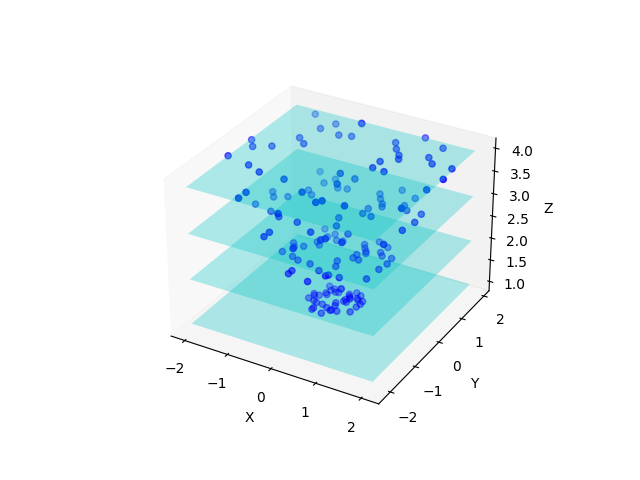

In [6]:
generador.visualizar(evento)

### Hamiltoniano y solucion

In [7]:
ham = principal.HamiltonianoSimple(epsilon=1e-7,gamma=2.0,delta=1.0)

In [8]:
ham.construir_hamiltoniano(evento)

(<Compressed Sparse Column sparse matrix of dtype 'float64'
 	with 4960 stored elements and shape (4800, 4800)>,
 array([1., 1., 1., ..., 1., 1., 1.]))

In [9]:
sol1,_ = ham.hamiltoniano_evento(evento)
T=0.45
sol1 = (sol1 > T).astype(int)


c:\Users\rojas\Videos\Implementaciones\proyecto\eventos\eventos.py:123: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot([j.x, k.x], [j.y, k.y], [j.z, k.z], 'r-', color='red', linewidth=0.7)


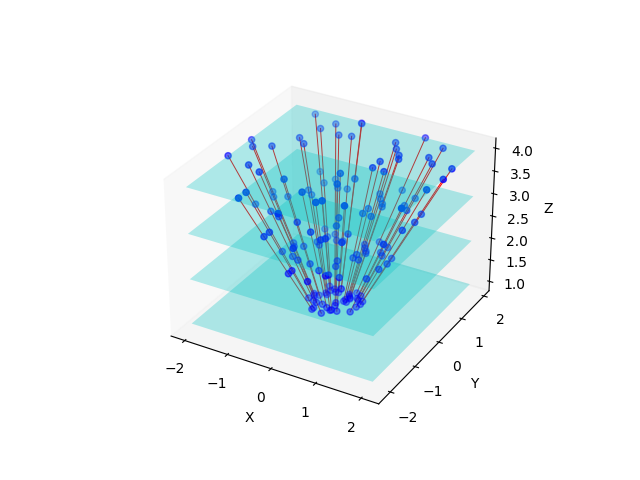

In [10]:
generador.visualizar_solucion(evento=evento,solucion=sol1)